In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import SVG
from IPython.display import display

In [2]:
#Берем файл со всеми дескрипторами (Из той папки, где код)
data = pd.read_excel('C://Users//plato//Documents//Python Scripts//Toluene_final//Toluene_ALL.xlsx', index_col=0) 

In [3]:
#Выделяем те дескрипторы, которые нужно для метода
merged_df = data[['VE1_RG', 'G3u:(Dragon7)', 'MATS8i:(Dragon7)', 'TDB06p:(Dragon7)', 'X', 'Eig03_EA(dm)', 'Mor23i:(Dragon7)', 'LnLn']]

In [4]:
#Сохраняем в отдельный файл (он сохранится в ту папку, в которой этот код)
merged_df.to_excel(f'Toluene_MLR.xlsx', index=True)

In [5]:
#Загружаем наш сохраненный файл
Porphs_data = pd.read_excel('C://Users//plato//Documents//Python Scripts//Toluene_final//Toluene_MLR.xlsx', index_col=0) 
Porphs_data.head()

,VE1_RG,G3u:(Dragon7),MATS8i:(Dragon7),TDB06p:(Dragon7),X,Eig03_EA(dm),Mor23i:(Dragon7),LnLn
SrNo,,,,,,,,
1,3.739,1.000,0.142,2.573,4.503693,0.0,-0.633,0.111176
2,4.153,0.283,0.034,2.163,3.985782,0.0,-0.235,0.107657
21,3.961,0.211,-0.118,2.952,3.925357,0.0,-1.210,0.083064
26,3.915,0.176,-0.233,2.892,3.884633,0.0,-1.093,0.046121
27,3.816,1.000,-0.190,3.239,3.942941,0.0,-1.529,0.026888


In [6]:
feature_names = Porphs_data.columns.values[:-1]

In [7]:
feature_names 

array(['VE1_RG', 'G3u:(Dragon7)', 'MATS8i:(Dragon7)', 'TDB06p:(Dragon7)',
       'X', 'Eig03_EA(dm)', 'Mor23i:(Dragon7)'], dtype=object)

In [8]:
#Выделяем Х и у 
y = Porphs_data.LnLn
X = Porphs_data.drop(['LnLn'], axis=1)

In [9]:
#Проверка Х
#X

In [10]:
#Проверка Х
#y

In [11]:
#Сохдаем корелляционную матрицу
corr_matrix = Porphs_data.corr().abs()
corr_matrix

,VE1_RG,G3u:(Dragon7),MATS8i:(Dragon7),TDB06p:(Dragon7),X,Eig03_EA(dm),Mor23i:(Dragon7),LnLn
VE1_RG,1.000000,0.011546,0.048218,0.083623,0.148582,0.226272,0.376732,0.226406
G3u:(Dragon7),0.011546,1.000000,0.100618,0.091306,0.261354,0.085304,0.156237,0.247484
MATS8i:(Dragon7),0.048218,0.100618,1.000000,0.067867,0.062076,0.180877,0.146240,0.352549
TDB06p:(Dragon7),0.083623,0.091306,0.067867,1.000000,0.367519,0.059168,0.525917,0.447585
X,0.148582,0.261354,0.062076,0.367519,1.000000,0.166393,0.035009,0.362223
Eig03_EA(dm),0.226272,0.085304,0.180877,0.059168,0.166393,1.000000,0.263859,0.528900
Mor23i:(Dragon7),0.376732,0.156237,0.146240,0.525917,0.035009,0.263859,1.000000,0.122373
LnLn,0.226406,0.247484,0.352549,0.447585,0.362223,0.528900,0.122373,1.000000


In [12]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
X = X.drop(Porphs_data[to_drop], axis=1)
from sklearn import preprocessing
# Делаем препроцессинг
X = pd.DataFrame(preprocessing.scale(X), columns=X.columns, index=X.index)

In [13]:
#делаем тренировочную выборку
X_train = X.drop([31, 2, 70, 57, 47, 39, 42, 66, 53], axis=0)
#делаем тренировочную целевую переменную
y_train = y.drop([31, 2, 70, 57, 47, 39, 42, 66, 53], axis=0)
#делаем тестовую выборку
X_test = X.loc[[31, 2, 70, 57, 47, 39, 42, 66, 53]]
#делаем тестовую целевую переменную
y_test = y.loc[[31, 2, 70, 57, 47, 39, 42, 66, 53]]

In [14]:
#Это для проверки на генетическом алгоритме
#X_train.to_excel(f'X_train.xlsx', index=True)
#y_train.to_excel(f'y_train.xlsx', index=True)

In [15]:
#Загружаем линейную регрессию
from sklearn import linear_model
#from sklearn.feature_selection import SelectFromModel
lm = linear_model.LinearRegression()

#selector = SelectFromModel(lm)
#features_important = selector.fit_transform(X_train, y_train)
#model = lm.fit(features_important, y_train)

In [16]:
#Обучаем линейную регрессию
#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
#Коэффициент наклона
lm.intercept_

0.7223107360144588

In [18]:
#Коэффициенты дескрипторов
lm.coef_

array([ 0.20807172, -0.16770193,  0.10067028,  0.43276623,  0.17996268,
        0.54257344,  0.2239952 ])

In [19]:
#Считаем R2train и R2test, в R2 всегда сперва реальные, потом предсказанные
from sklearn.metrics import r2_score
y_pred = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
R2_train = r2_score(y_train, y_pred)
R2_test = r2_score(y_test, y_pred_test)
print("Train R^2:", R2_train)
print("Test R^2:", R2_test)

Train R^2: 0.863108029660811
Test R^2: 0.7764670109744846


In [20]:
R2_adj = 1 - ( 1-R2_train ) * ( len(y_pred) - 1 ) / ( len(y_pred) - X_train.shape[1] - 1 )
print("Train R^2 adjusted:", R2_adj)

Train R^2 adjusted: 0.8288850370760138


In [21]:
#Создаем функцию расчета MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [22]:
mape_train = calculate_mape(y_train, y_pred)
mape_test = calculate_mape(y_test, y_pred_test)
print(f"MAPE for the training dataset: {mape_train}")
print(f"MAPE for the test dataset: {mape_test}")

MAPE for the training dataset: 95.54781954221822
MAPE for the test dataset: 137.97395052145737


In [23]:
#Максимальная ошибка предсказания
import sklearn.metrics as metrics
MaxAE = metrics.max_error(y_train, y_pred)  #max_error metric calculates the maximum residual error
print(f"MaxAE: {MaxAE}")
#Средняя абсолютная ошибка предсказания
MAE = metrics.mean_absolute_error(y_train, y_pred) #Mean absolute error regression loss
print(f"MAE: {MAE}")

MaxAE: 0.7349379170004393
MAE: 0.22169726511705024


In [24]:
#Среднеквадратичная ошибка 
from sklearn.metrics import mean_squared_error
metrics.mean_squared_error(y_train, y_pred) #Mean squared error regression loss
from math import sqrt
rmse_train = sqrt(mean_squared_error(y_train, y_pred))
print(f"RMSE_train: {rmse_train}")
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE_test: {rmse_test}")

RMSE_train: 0.279804684919669
RMSE_test: 0.3378002061396084


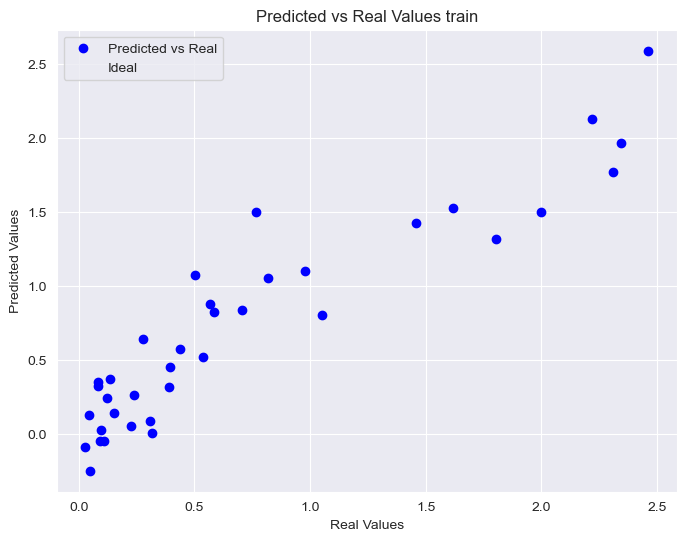

In [25]:
import matplotlib.pyplot as plt

# Строим график только тренировочных данных
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, color='blue', label='Predicted vs Real')
plt.plot(y_train, y_pred, color='red', linestyle='None', label='Ideal')
plt.title('Predicted vs Real Values train')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

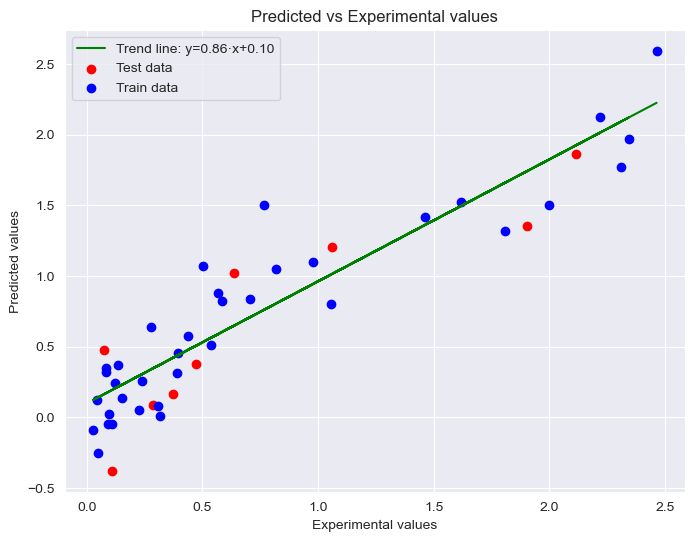

intercept: 0.10008892830361037
slope: 0.8631080296608109


In [26]:
import matplotlib.pyplot as plt
# Строим график всех данных с аппроксимацией
plt.figure(figsize=(8, 6))
# Выполнение линейной аппроксимации (подпись к графику делал руками)
slope, intercept = np.polyfit(y_train, y_pred, 1)
plt.plot(y_train, slope * y_train + intercept, color='green', label='Trend line: y=0.86·x+0.10')
plt.scatter(y_test, y_pred_test, color='red', label='Test data')
plt.scatter(y_train, y_pred, color='blue', label='Train data')
plt.title('Predicted vs Experimental values')
plt.xlabel('Experimental values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

print(f"intercept: {intercept}")
print(f"slope: {slope}")

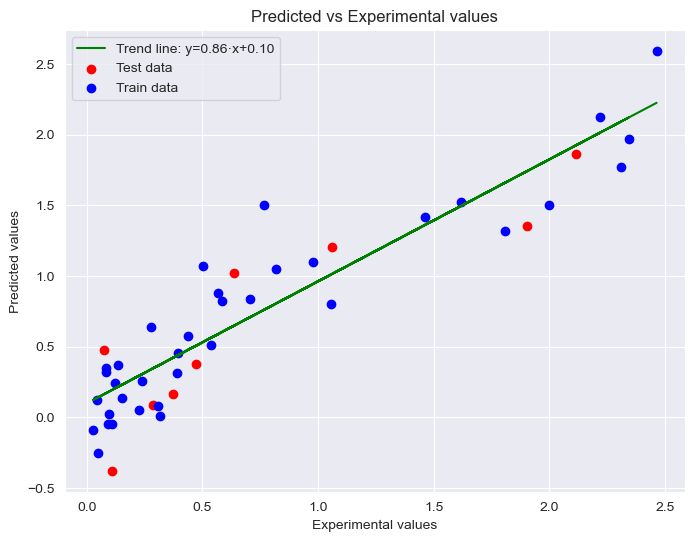

In [27]:
#Сохраняет в PDF в высоком качестве
import matplotlib.pyplot as plt

# Строим график всех данных с аппроксимацией
plt.figure(figsize=(8, 6))
# Выполнение линейной аппроксимации (подпись к графику делал руками)
slope, intercept = np.polyfit(y_train, y_pred, 1)
plt.plot(y_train, slope * y_train + intercept, color='green', label='Trend line: y=0.86·x+0.10')
plt.scatter(y_test, y_pred_test, color='red', label='Test data')
plt.scatter(y_train, y_pred, color='blue', label='Train data')
plt.title('Predicted vs Experimental values')
plt.xlabel('Experimental values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)

# Сохранение графика в PDF
plt.savefig('Toluene_MLR_graph.pdf')

# Отображение графика (необязательно)
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
# Получаем стандартизированные коэффициенты регрессии
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
lm.fit(X_train_scaled, y_train)
standardized_coefficients = lm.coef_
# Определим относительный вклад каждого дескриптора
relative_contributions = np.abs(standardized_coefficients)
# Нормализуем относительный вклад в процентах
total_contribution = np.sum(relative_contributions)
relative_contributions_percent = (relative_contributions / total_contribution) * 100
# Выведите относительный вклад в процентах для каждого дескриптора
for i, contribution_percent in enumerate(relative_contributions_percent):
    print(f"Descriptor {i + 1}: {contribution_percent:.2f}%")

Descriptor 1: 11.69%
Descriptor 2: 10.09%
Descriptor 3: 5.69%
Descriptor 4: 22.07%
Descriptor 5: 10.29%
Descriptor 6: 27.93%
Descriptor 7: 12.24%


In [29]:
#Считаем q2
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score as r2
# Assuming you have X_train and y_train in a correct form
lm2 = linear_model.LinearRegression()
y_pred = cross_val_predict(lm2, X_train, y_train, cv=len(X_train))
q2 = r2(y_train,y_pred)
print(f"q2: {q2}")

q2: 0.7713887094993035


In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from alibi.explainers import ALE, plot_ale

C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0.5, 0, 'Median income in $10,000')

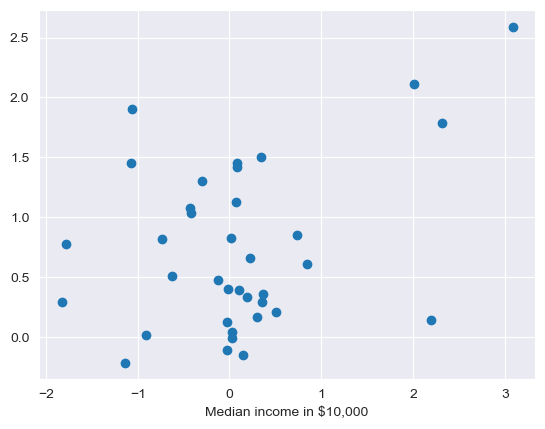

In [31]:
FEATURE = 'VE1_RG'
index = feature_names.tolist().index(FEATURE)

fig, ax = plt.subplots()
ax.scatter(X_train.values[:, index], lm.predict(X_train));

ax.set_xlabel('Median income in $10,000')

In [32]:
lm_ale = ALE(lm.predict, feature_names=feature_names, target_names=['LnLn'])

In [33]:
X_train1 = X_train.to_numpy()


In [34]:
lm_exp = lm_ale.explain(X_train1)

In [59]:
import matplotlib.pyplot as plt
from alibi.explainers import ALE

# Предположим, что у вас уже есть обученная модель и данные

# Создание объяснения ALE (предположим, что lm_exp уже определен)
# lm_exp = ALE(...) 

# Построение графика
plot_ale(lm_exp, n_cols=4, fig_kw={'figwidth':14, 'figheight': 7})

# Сохранение графика в PDF
plt.savefig('Toluene_MLR_ale_plot.pdf', format='pdf')

# Если необходимо закрыть окно с графиком после сохранения
plt.close()

In [36]:
lm.coef_

array([ 0.21350901, -0.18443994,  0.10392406,  0.40324599,  0.18799155,
        0.51031688,  0.2237047 ])

In [37]:
slopes = np.array([((v[-1]-v[0])/(f[-1]-f[0])).item() for v, f in zip(lm_exp.ale_values, lm_exp.feature_values)])

In [38]:
slopes

array([ 0.21350901, -0.18443994,  0.10392406,  0.40324599,  0.18799155,
        0.51031688,  0.2237047 ])

In [39]:
np.allclose(lm.coef_, slopes)

True

In [40]:
import shap
shap.initjs()

In [41]:
lin_reg_explainer1 = shap.LinearExplainer(lm, X_train)

In [42]:
lin_reg_explainer1 = shap.LinearExplainer(lm, X_train)
sample_idx = 0

# Используем .iloc для доступа к строке по индексу
shap_vals = lin_reg_explainer1.shap_values(X_test.iloc[sample_idx])

print("Expected/Base Value : ", lin_reg_explainer1.expected_value)
print("Shap Values for Sample %d : " % sample_idx, shap_vals)
print("\n")

# Преобразуем строку в numpy array и используем метод reshape
print("Prediction From Model : ", lm.predict(X_test.iloc[sample_idx].values.reshape(1, -1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer1.expected_value + shap_vals.sum())

Expected/Base Value :  0.7395140337399877
Shap Values for Sample 0 :  [ 0.04591064  0.06144484 -0.00651046 -0.04748736 -0.12224454 -0.2532746
  0.08914408]


Prediction From Model :  0.5064966312058188
Prediction From Adding SHAP Values to Base Value :  0.5064966312058189


In [43]:
lin_reg_explainer2 = shap.LinearExplainer(lm, X_train, feature_perturbation="correlation_dependent")

C:\Users\plato\anaconda3\Lib\site-packages\shap\explainers\_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [44]:
sample_idx = 0

# Используем .iloc для доступа к строке по индексу
shap_vals = lin_reg_explainer2.shap_values(X_test.iloc[sample_idx].values.reshape(1, -1))[0]

print("Base Value : ", lin_reg_explainer2.expected_value)
print("Shap Values for Sample %d : " % sample_idx, shap_vals)
print("\n")

# Преобразуем строку в numpy array и используем метод reshape
print("Prediction From Model : ", lm.predict(X_test.iloc[sample_idx].values.reshape(1, -1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer2.expected_value + shap_vals.sum())

Base Value :  0.7395140337399877
Shap Values for Sample 0 :  [ 0.03508907  0.04701619  0.0023351   0.01381108 -0.15735803 -0.21018667
  0.03627587]


Prediction From Model :  0.5064966312058188
Prediction From Adding SHAP Values to Base Value :  0.5064966312058159


In [45]:
explainer = shap.LinearExplainer(lm, X_train)

In [46]:
shap_values = explainer.shap_values(X_test)

In [60]:
import shap
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть обученная модель, X_test и shap_values

# Создаем фигуру
plt.figure()

# Построение SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False)  # Убедитесь, что show=False

# Сохранение графика в PDF
plt.savefig('Toluene_MLR_SHAP_test_plot.pdf', format='pdf')

# Закрытие окна с графиком после сохранения
plt.close()

In [48]:
explainer = shap.LinearExplainer(lm, X_train)
shap_test = explainer(X_test)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 9

Sample shap value:
.values =
array([ 0.04591064,  0.06144484, -0.00651046, -0.04748736, -0.12224454,
       -0.2532746 ,  0.08914408])

.base_values =
0.7395140337399877

.data =
array([ 0.31265929, -0.25181676, -0.11590955, -0.05925214, -0.61897391,
       -0.55870445,  0.44505316])


In [49]:
# Вывод ожидаемого (базового) значения
print(f"Expected value: {explainer.expected_value:.1f}")

# Вывод среднего значения целевой переменной в обучающем наборе
print(f"Average target value (training data): {y_train.mean():.1f}")

# Вывод базового значения SHAP
unique_base_values = np.unique(shap_test.base_values)
print(f"Base value: {unique_base_values[0]:.1f}")

Expected value: 0.7
Average target value (training data): 0.7
Base value: 0.7


In [50]:
(shap_test.data == X_test).describe()

,VE1_RG,G3u:(Dragon7),MATS8i:(Dragon7),TDB06p:(Dragon7),X,Eig03_EA(dm),Mor23i:(Dragon7)
count,9,9,9,9,9,9,9
unique,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True
freq,9,9,9,9,9,9,9


In [51]:
pd.DataFrame(shap_test.data, columns=shap_test.feature_names, 
             index=X_test.index)

,VE1_RG,G3u:(Dragon7),MATS8i:(Dragon7),TDB06p:(Dragon7),X,Eig03_EA(dm),Mor23i:(Dragon7)
SrNo,,,,,,,
31,0.312659,-0.251817,-0.115910,-0.059252,-0.618974,-0.558704,0.445053
2,0.658188,0.037234,0.192079,-2.989373,-0.047675,-0.558704,1.571906
70,-1.443776,-0.413489,-0.433833,0.643087,-0.280807,-0.558704,-1.259714
57,0.774879,-0.511472,0.510002,-1.336810,-0.712645,-0.558704,0.697790
47,-1.030051,-0.168531,-1.188901,-0.017938,1.540987,-0.558704,-0.017761
39,-1.175537,-0.310607,-0.185455,0.452407,-0.641601,1.270692,-1.141394
42,-0.922453,-0.452682,0.162273,-0.542309,-0.845697,1.880491,-0.224619
66,-0.389006,-0.535968,1.741955,1.351782,0.978903,-0.558704,-0.039494
53,-0.299593,-0.320405,1.235265,0.392025,-0.499013,2.447299,-1.708040


In [52]:
shap_df = pd.DataFrame(shap_test.values, 
                       columns=shap_test.feature_names, 
                       index=X_test.index)
shap_df

,VE1_RG,G3u:(Dragon7),MATS8i:(Dragon7),TDB06p:(Dragon7),X,Eig03_EA(dm),Mor23i:(Dragon7)
SrNo,,,,,,,
31,0.045911,0.061445,-0.006510,-0.047487,-0.122245,-0.253275,0.089144
2,0.119684,0.008132,0.025497,-1.229047,-0.014845,-0.253275,0.341226
70,-0.329104,0.091264,-0.039550,0.235728,-0.058672,-0.253275,-0.292220
57,0.144599,0.109336,0.058537,-0.562658,-0.139854,-0.253275,0.145683
47,-0.240770,0.046084,-0.118020,-0.030828,0.283810,-0.253275,-0.014390
39,-0.271833,0.072288,-0.013738,0.158837,-0.126498,0.680297,-0.265752
42,-0.217797,0.098492,0.022399,-0.242278,-0.164867,0.991488,-0.060665
66,-0.103901,0.113854,0.186566,0.521507,0.178143,-0.253275,-0.019251
53,-0.084811,0.074095,0.133909,0.134488,-0.099693,1.280740,-0.392513


In [53]:
# Получаем ожидаемое значение как скаляр (если это действительно нужно)
expected_value = explainer.expected_value

# Выполняем операции с предсказаниями, ожидаемым значением и суммой SHAP
predictions = lm.predict(X_test)
shap_sum = shap_df.sum(axis=1)

# Проверяем близость между предсказаниями и целевым выражением
np.isclose(predictions, expected_value + shap_sum)

C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [54]:
columns = shap_df.apply(np.abs).mean()\
                 .sort_values(ascending=False).index

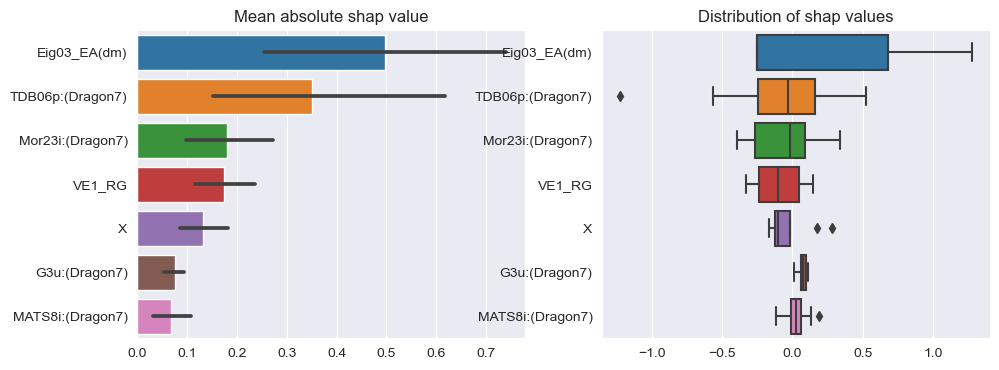

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(11,4))
sns.barplot(data=shap_df[columns].apply(np.abs), orient='h', 
            ax=ax[0])
ax[0].set_title("Mean absolute shap value")
sns.boxplot(data=shap_df[columns], orient='h', ax=ax[1])
ax[1].set_title("Distribution of shap values");

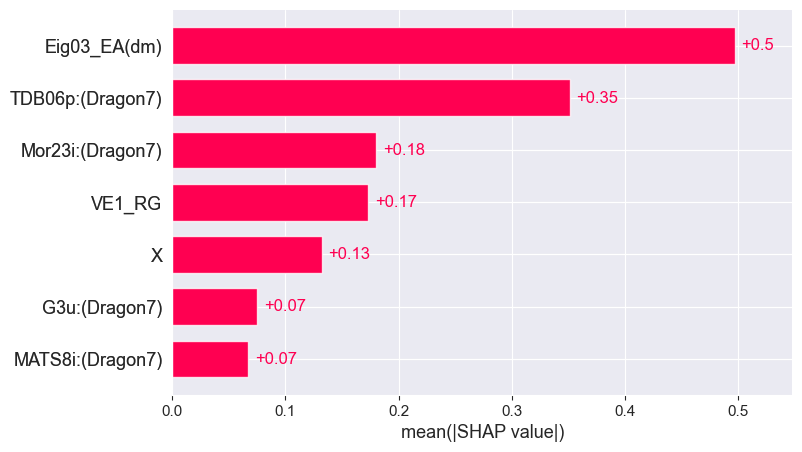

In [56]:
shap.plots.bar(shap_test)

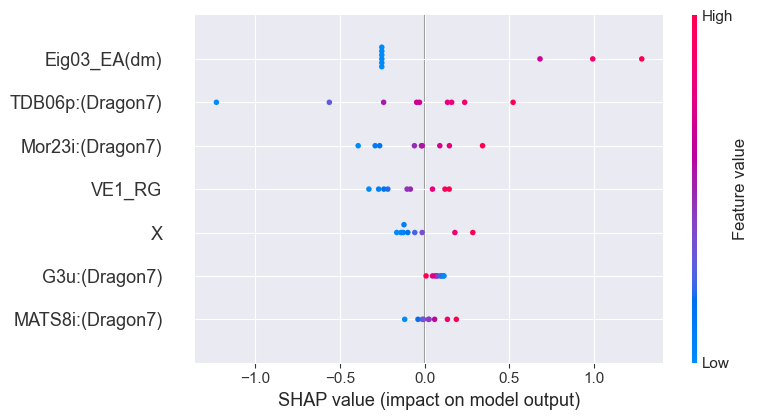

In [57]:
shap.summary_plot(shap_test)

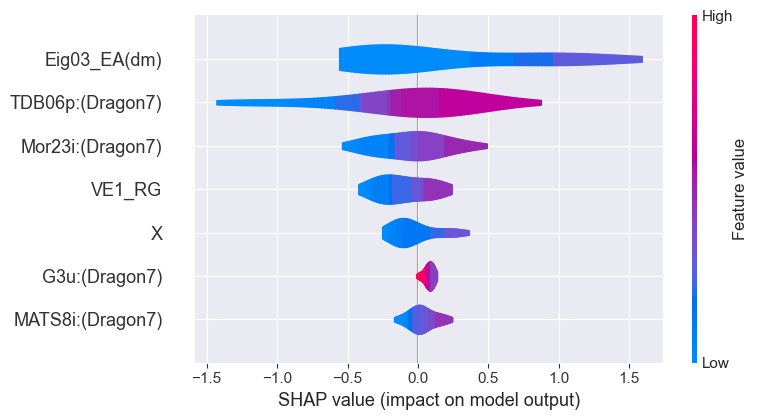

In [58]:
shap.summary_plot(shap_test, plot_type='violin')